In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/기계학습/7개 사리마 01~22.CSV', index_col=0, encoding='cp949')
df=df.reset_index()

In [ ]:
df['color']

0       1
1       1
2       1
3       1
4       1
       ..
247    21
248    21
249    21
250    21
251    21
Name: color, Length: 252, dtype: int64

In [ ]:
target = df['color']

In [ ]:
df.columns

Index(['color', '감염병발생수', '강수량', '기온', '사망자수', '이혼건수', '출생아수', '혼인건수'], dtype='object')

In [ ]:
data=df[['감염병발생수', '강수량', '기온', '사망자수', '이혼건수', '출생아수', '혼인건수']]

In [ ]:
df_iris = pd.DataFrame(data)

In [ ]:
df_iris['target'] = target

In [ ]:
df_iris.head()

,감염병발생수,강수량,기온,사망자수,이혼건수,출생아수,혼인건수,target
0,7669,51.9,-2.3,21077,9270,56949,27280,1
1,2613,63.5,0.8,19710,11193,49939,24243,1
2,3301,14.9,5.3,22168,12266,54549,28002,1
3,5144,26.4,12.5,20977,10843,48309,29065,1
4,4509,32.8,18.1,20435,11685,46802,33809,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], test_size=0.2, 
                                                    random_state=20)
x_train.shape, y_train.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


((201, 7), (201,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
x_train

,감염병발생수,강수량,기온,사망자수,이혼건수,출생아수,혼인건수
122,3739,23.8,4.3,22224,9652,43260,27701
98,2512,55.8,6.7,21026,10559,39834,25817
155,11386,21.1,1.1,23260,9992,31972,37285
235,6427,420.8,26.4,25289,8455,22402,15032
150,4479,319.6,26.0,20519,10789,36188,27256
...,...,...,...,...,...,...,...
156,7034,10.3,0.2,23387,9072,41229,26940
223,11784,136.9,26.0,23707,9054,24371,18336
15,350,153.7,13.2,20595,11713,43453,26328
218,9952,39.4,7.2,24985,9071,27049,19549


In [ ]:
y_train

122    11
98      9
155    13
235    20
150    13
       ..
156    14
223    19
15      2
218    19
99      9
Name: target, Length: 201, dtype: int64

In [ ]:
prediction

array([22])

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [ ]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (51, 8)
y_test 크기: (51,)


In [ ]:
X_new = np.array([[4731.662605,90.391158,13.498333,27320.952800,8126.401400,19391.536625,14374.765517,0]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 8)


In [ ]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))

예측: [21]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


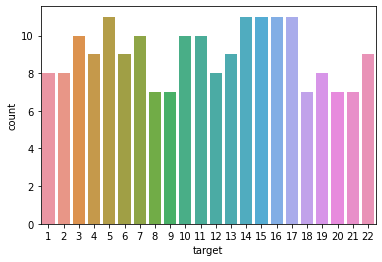

In [ ]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


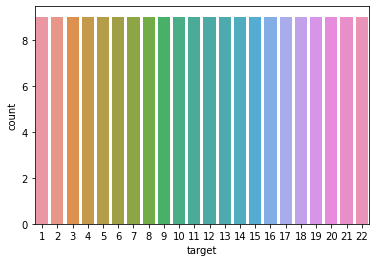

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])
sns.countplot(y_train)

In [ ]:
x_train.shape, y_train.shape
x_valid.shape, y_valid.shape

((66, 7), (66,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
prediction = lr.predict(x_valid)
prediction[:5]
(prediction == y_valid).mean() 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.3333333333333333

DT


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, 
                                                    random_state=20) 

In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
iris_dtc=DecisionTreeClassifier(random_state=20)

In [ ]:
iris_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [ ]:
prediction=iris_dtc.predict(X_test)

In [ ]:
y_test

238    20
29      3
80      7
163    14
119    10
102     9
224    19
81      7
103     9
90      8
194    17
34      3
241    21
58      5
13      2
20      2
235    20
98      9
231    20
122    11
117    10
200    17
92      8
237    20
16      2
53      5
234    20
233    20
120    11
91      8
244    21
174    15
240    21
124    11
28      3
107     9
204    18
172    15
63      6
148    13
219    19
135    12
176    15
239    20
59      5
72      7
168    15
104     9
15      2
109    10
111    10
47      4
153    13
Name: color, dtype: int64

In [ ]:
prediction

array([20,  3,  7, 14, 10,  9, 19,  7,  9,  8, 17,  3, 21,  5,  2,  2, 20,
        9, 20, 11, 10, 17,  8, 20,  2,  5, 20, 20, 11,  8, 21, 15, 21, 11,
        3,  9, 18, 15,  6, 13, 19, 12, 15, 20,  5,  7, 15,  9,  2, 10, 10,
        4, 13])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

In [ ]:
test_set = np.array([[5, 2.9, 1, 0.2]]) #이거 우리 예측값으로 바꿔줘야 돼
print("Predicted target name: {}".format(
    df['t'].unique()[model.predict_classes(test_set)]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, random_state=0)

In [ ]:
data=df[['감염병발생수', '강수량', '기온', '사망자수', '이혼건수', '출생아수', '혼인건수']]

In [ ]:
target=df[['color']]

In [ ]:
target

,color
0,1
1,1
2,1
3,1
4,1
...,...
259,22
260,22
261,22
262,22


In [ ]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (198, 7)
y_train 크기: (198, 1)
